In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import galsim
import fpfs
import impt
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid

# HSC like simulation using parametric galaxies from COSMOS

2023/09/01 02:10:37 ---  Processing for g1-2222, and shears for four redshift bins are [0.02 0.02 0.02 0.02].
2023/09/01 02:10:37 ---  Making Basic Simulation. ID: 212


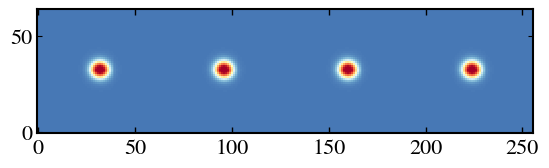

2023/09/01 02:10:37 ---  Order of the shear estimator: nnord=4
2023/09/01 02:10:37 ---  Shapelet kernel in configuration space: sigma= 0.7000 arcsec
2023/09/01 02:10:37 ---  Detection kernel in configuration space: sigma= 0.7000 arcsec


[[ 32  32]
 [ 32  96]
 [ 32 160]
 [ 32 224]]
Input shear is: 0.020000
Estimated shear is: 0.020003


In [8]:
shear_value = 0.02
scale = 0.168
nx, ny = 64, 64
outDir='galaxy_basicCenter_psf60'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
psfData = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=nx, ny=ny, scale=scale).array

# Four Galaxies to cancel spin-2 and spin-4 ansiotropies
# spin-2 is shape noise in diagnonal elements of shear response matrix
# spin-4 is shape noise in diagnonal and of-diagnoal elements of shear response matrix, 
# but an order of magnitude smaller than spin-2
seed = 212
gname = "g1-2222"
gal_data = fpfs.simutil.make_isolate_sim(
    gal_type="basic",
    psf_obj=psfInt,
    gname=gname,
    seed=seed,
    ny=ny,
    nx=nx*4,
    scale=scale,
    do_shift=False,
    nrot=4,
)

plt.close()
plt.imshow(gal_data,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal_data,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.3))
plt.show()
# Now we measure shear
rcut = 32

# Force detection at the stamp center point (ngrid//2, ngrid//2)
indX = np.arange(int(nx/2), nx*4, nx)
indY = np.arange(int(ny/2), ny, ny)
inds = np.meshgrid(indY, indX, indexing="ij")
coords = np.vstack([np.ravel(_) for _ in inds]).T
print(coords)

fpTask  =   fpfs.image.measure_source(psfData,pix_scale = scale, sigma_arcsec=0.7)
mms =  fpTask.measure(gal_data, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp

print('Input shear is: %.6f' %shear_value)
print('Estimated shear is: %.6f' %shear)

# HSC like simulation using parametric + Knots galaxies

2023/08/31 02:19:06 ---  Processing for g1-2222, and shears for four redshift bins are [0.02 0.02 0.02 0.02].
2023/08/31 02:19:06 ---  Making Basic Simulation. ID: 212
2023/08/31 02:19:07 ---  Processing for g1-2222, and shears for four redshift bins are [0.02 0.02 0.02 0.02].
2023/08/31 02:19:07 ---  Making galaxies with Random Knots.


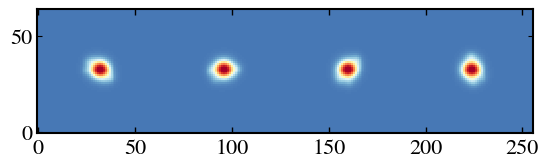

2023/08/31 02:19:07 ---  Order of the shear estimator: nnord=4
2023/08/31 02:19:07 ---  Shapelet kernel in configuration space: sigma= 0.7000 arcsec
2023/08/31 02:19:07 ---  Detection kernel in configuration space: sigma= 0.7000 arcsec


Input shear is: 0.020000
Estimated shear is: 0.020002


In [3]:
shear_value = 0.02
scale = 0.168
nx, ny = 64, 64
outDir='galaxy_basicCenter_psf60'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
psfData = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=nx, ny=ny, scale=scale).array

# Four Galaxies to cancel spin-2 and spin-4 ansiotropies
# spin-2 is shape noise in diagnonal elements of shear response matrix
# spin-4 is shape noise in diagnonal and of-diagnoal elements of shear response matrix, 
# but an order of magnitude smaller than spin-2
gname = "g1-2222"
seed = 212
gal_data = fpfs.simutil.make_isolate_sim(
    gal_type="basic",
    psf_obj=psfInt,
    gname=gname,
    seed=seed,
    ny=ny,
    nx=nx*4,
    scale=scale,
    do_shift=False,
    nrot=4,
)

gal_data2 = fpfs.simutil.make_isolate_sim(
    gal_type="random",
    psf_obj=psfInt,
    gname=gname,
    seed=seed,
    ny=ny,
    nx=nx*4,
    scale=scale,
    do_shift=False,
    nrot=4,
)

gal_data = gal_data * 0.7 + gal_data2 * 0.2

plt.close()
plt.imshow(gal_data,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal_data,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.3))
plt.show()
# Now we measure shear
rcut = 32

# Force detection
indX = np.arange(int(nx/2), nx*4, nx)
indY = np.arange(int(ny/2), ny, ny)
inds = np.meshgrid(indY, indX, indexing="ij")
coords = np.vstack(inds).T

fpTask  =   fpfs.image.measure_source(psfData,pix_scale = scale, sigma_arcsec=0.7)
mms =  fpTask.measure(gal_data, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp

print('Input shear is: %.6f' %shear_value)
print('Estimated shear is: %.6f' %shear)

# Simulation with extremely small pixel size

2023/08/31 02:19:08 ---  Processing for g1-2222, and shears for four redshift bins are [0.02 0.02 0.02 0.02].
2023/08/31 02:19:08 ---  Making Basic Simulation. ID: 2


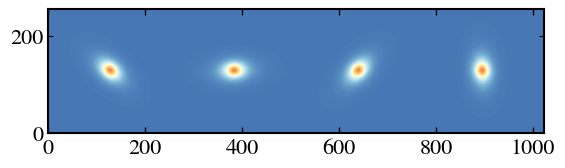

2023/08/31 02:19:09 ---  Order of the shear estimator: nnord=4
2023/08/31 02:19:09 ---  Shapelet kernel in configuration space: sigma= 0.7000 arcsec
2023/08/31 02:19:09 ---  Detection kernel in configuration space: sigma= 0.7000 arcsec


Input shear is: 0.020000
Estimated shear is: 0.020001


In [4]:
shear_value = 0.02
scale = 0.168/4
nx, ny = 256, 256
outDir='galaxy_basicCenter_psf60'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
psfData = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=nx, ny=ny, scale=scale).array

# Four Galaxies to cancel spin-2 and spin-4 ansiotropies
# spin-2 is shape noise in diagnonal elements of shear response matrix
# spin-4 is shape noise in diagnonal and of-diagnoal elements of shear response matrix, 
# but an order of magnitude smaller than spin-2

gname = "g1-2222"
gal_data = fpfs.simutil.make_isolate_sim(
    gal_type="basic",
    psf_obj=psfInt,
    gname=gname,
    seed=2,
    ny=ny,
    nx=nx*4,
    scale=scale,
    do_shift=False,
    nrot=4,
    ngrid=nx,
)
plt.close()
plt.imshow(gal_data,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal_data,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.3))
plt.show()
# Now we measure shear
rcut = 32

# Force detection
indX = np.arange(int(nx/2), nx*4, nx)
indY = np.arange(int(ny/2), ny, ny)
inds = np.meshgrid(indY, indX, indexing="ij")
coords = np.vstack(inds).T

fpTask  =   fpfs.image.measure_source(psfData,pix_scale = scale, sigma_arcsec=0.7)
mms =  fpTask.measure(gal_data, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp

print('Input shear is: %.6f' %shear_value)
print('Estimated shear is: %.6f' %shear)